# 09 - XGBoost

In [14]:
from setup import * #gets the real data

In [15]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing, ensemble
import xgboost as xgb
import scikitplot #pip install scikit-plot
import dtreeviz
import yellowbrick.model_selection as ms #validation_curve in here
from yellowbrick import classifier
#also, must install graphviz for plotting to work with xgb

In [17]:

X = pd.concat([X_train, X_test], axis='index')
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(kag_y_train)
y_test = label_encoder.transform(kag_y_test)
y = pd.Series([*y_train, *y_test], index=X.index) # the * does the unpacking of y_train elements. 
#Otherwise, it would have made a 2-D array of y_train and y_test. But, by including the stars, 
#it makes it just one long Series

In [20]:
type(y_train)

numpy.ndarray

In [25]:
pd.Series([y_train,y_test]) #compare. this doesn't work

0    [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...
1    [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, ...
dtype: object

In [26]:
xg_oob = xgb.XGBClassifier() #oob = out of the box here.
xg_oob.fit(X_train, y_train)
xg_oob.score(X_test, y_test) #this is already doing better! Damn! Straight out of the box.
# Default is 100 boosting rounds.

0.7502762430939226

In [27]:
xg2 = xgb.XGBClassifier(max_depth=2, n_estimators=2)
xg2.fit(X_train, y_train)
xg2.score(X_test, y_test) #significantly worse if we only let it take 2 tries

0.6939226519337016

## Looking at the first tree

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

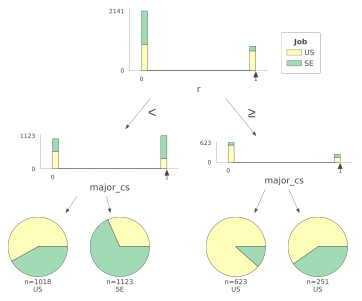

In [29]:
viz = dtreeviz.model(xg2, X_train=X, y_train=y, target_name='Job', feature_names=list(X.columns),
                     class_names=['US','SE'], tree_index=0)
viz.view(depth_range_to_display=[0,2]) #max depth is 2, also, so this is all of it

<Axes: >

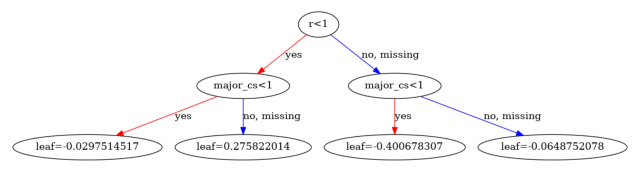

In [30]:
xgb.plot_tree(xg2, num_trees=0)

In [31]:
X.columns

Index(['age', 'education', 'years_exp', 'compensation', 'python', 'r', 'sql',
       'Q1_Male', 'Q1_Female', 'Q1_Prefer not to say',
       'Q1_Prefer to self-describe', 'Q3_United States of America', 'Q3_India',
       'Q3_China', 'major_cs', 'major_other', 'major_eng', 'major_stat'],
      dtype='object')

In [44]:
pd.DataFrame(X.index).agg(['min','max']) 


,0
min,3
max,23813


In [45]:
X.iloc[3]

age                                40.0
education                          20.0
years_exp                           3.0
compensation                   125000.0
python                              1.0
r                                   0.0
sql                                 1.0
Q1_Male                             0.0
Q1_Female                           1.0
Q1_Prefer not to say                0.0
Q1_Prefer to self-describe          0.0
Q3_United States of America         1.0
Q3_India                            0.0
Q3_China                            0.0
major_cs                            0.0
major_other                         1.0
major_eng                           0.0
major_stat                          0.0
Name: 3110, dtype: float64

In [46]:
#X.iloc[7894] #this isn't anyone

IndexError: single positional indexer is out-of-bounds

In [ ]:
se7894 = pd.DataFrame({'age': {7894:22},
    'education':{7894:16.0},
    'years_exp':{7894:1.0}, 
    'compensation':{7894:0}, 
    'python':{7894:1}, 
    'r':{7894:0}, 
    'sql':{7894:0},
    'Q1_Male':{7894:1}, 
    'Q1_Female':{7894:0}, 
    'Q1_Prefer not to say':{7894:0},
    'Q1_Prefer to self-describe':{7894:0},
    'Q3_United States of America':{7894:0},
    'Q3_India':{7894:1},
    'Q3_China':{7894:0},
    'major_cs':{7894:0}, 
    'major_other':{7894:0}, 
    'major_eng':{7894:0},
    'major_stat':{7894:0}}
)

In [ ]:
se7894

In [52]:
# Ctrl + K + C to comment a line. Ctrl + K + U to uncomment a line
# this doesn't work, because seems each item as a set
# senoIndex = pd.DataFrame({'age': {22},
#    'education':{16.0},
#    'years_exp':{1.0}, 
#    'compensation':{0},
#    'python':{1}, 
#    'r':{0}, 
#    'sql':{0},
#    'Q1_Male':{1}, 
#    'Q1_Female':{0}, 
#    'Q1_Prefer not to say':{0},
#    'Q1_Prefer to self-describe':{0},
#    'Q3_United States of America':{0},
#    'Q3_India':{1},
#    'Q3_China':{0},
#    'major_cs':{0}, 
#    'major_other':{0}, 
#    'major_eng':{0},
#    'major_stat':{0}}
# )

In [53]:
xg2.predict_proba(se7894)

array([[0.5216498 , 0.47835022]], dtype=float32)

In [68]:
#xg2.predict_proba(X.iloc[3])
#interesting this doesn't work!
#xg2.predict_proba(dict(X.iloc[3,:])) #also doesn't work

ValueError: If using all scalar values, you must pass an index

In [69]:
xg2.predict(pd.DataFrame(se7894)) #predict is just 0 or 1

array([0])